In [139]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max.rows', 500)

In [5]:
online = pd.read_excel('Online Retail.xlsx')

In [8]:
# Sample the dataset
# 108381 rows
online = online.sample(int(online.shape[0]*0.2))
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
331525,566018,22595,GINGHAM HEART DECORATION,1,2011-09-08 12:42:00,0.85,13137.0,United Kingdom
146398,548987,22794,SWEETHEART WIRE MAGAZINE RACK,1,2011-04-05 12:50:00,7.95,14535.0,United Kingdom
127635,547243,22264,FELT FARM ANIMAL WHITE BUNNY,1,2011-03-21 16:59:00,0.85,17231.0,United Kingdom
312455,564355,23300,GARDENERS KNEELING PAD CUP OF TEA,12,2011-08-24 15:12:00,1.65,13507.0,United Kingdom
357810,568134,22470,HEART OF WICKER LARGE,1,2011-09-23 17:02:00,5.79,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
412306,572284,23528,WALL ART SPACEBOY,1,2011-10-23 12:08:00,3.75,16744.0,United Kingdom
375521,569469,85049C,ROMANTIC PINKS RIBBONS,4,2011-10-04 12:22:00,1.25,16360.0,United Kingdom
385918,C570221,23206,LUNCH BAG APPLE DESIGN,-10,2011-10-09 12:56:00,1.65,13113.0,United Kingdom
313034,564434,84832,ZINC WILLIE WINKIE CANDLE STICK,12,2011-08-25 11:59:00,0.85,14687.0,United Kingdom


In [33]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, 1) 

In [38]:
# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform(min)

# View the top 5 rows
print(online.head())

       InvoiceNo StockCode                         Description  Quantity  \
331525    566018     22595            GINGHAM HEART DECORATION         1   
146398    548987     22794       SWEETHEART WIRE MAGAZINE RACK         1   
127635    547243     22264       FELT FARM ANIMAL WHITE BUNNY          1   
312455    564355     23300  GARDENERS KNEELING PAD CUP OF TEA         12   
357810    568134     22470               HEART OF WICKER LARGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
331525 2011-09-08 12:42:00       0.85     13137.0  United Kingdom 2011-09-01   
146398 2011-04-05 12:50:00       7.95     14535.0  United Kingdom 2011-04-01   
127635 2011-03-21 16:59:00       0.85     17231.0  United Kingdom 2011-03-01   
312455 2011-08-24 15:12:00       1.65     13507.0  United Kingdom 2011-08-01   
357810 2011-09-23 17:02:00       5.79         NaN  United Kingdom 2011-09-01   

        CohortDay  CohortIndex CohortMonth  
331525 2011-02-01

In [35]:
# Define a function that gets the integers for date parts from the certian column
def get_date_int(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year, month, day

In [36]:
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the CohortDay column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [156]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# add 1 for better interpretation
online['CohortIndex'] = years_diff * 12 + months_diff + 1
print(online.head())

       InvoiceNo StockCode                         Description  Quantity  \
331525    566018     22595            GINGHAM HEART DECORATION         1   
146398    548987     22794       SWEETHEART WIRE MAGAZINE RACK         1   
127635    547243     22264       FELT FARM ANIMAL WHITE BUNNY          1   
312455    564355     23300  GARDENERS KNEELING PAD CUP OF TEA         12   
357810    568134     22470               HEART OF WICKER LARGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
331525 2011-09-08 12:42:00       0.85     13137.0  United Kingdom 2011-09-01   
146398 2011-04-05 12:50:00       7.95     14535.0  United Kingdom 2011-04-01   
127635 2011-03-21 16:59:00       0.85     17231.0  United Kingdom 2011-03-01   
312455 2011-08-24 15:12:00       1.65     13507.0  United Kingdom 2011-08-01   
357810 2011-09-23 17:02:00       5.79         NaN  United Kingdom 2011-09-01   

        CohortDay  CohortIndex CohortMonth  
331525 2011-02-01

In [159]:
# Count the number of unique values per customer ID
cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data.CohortIndex = cohort_data.CohortIndex.apply(lambda x:int(x))
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,810
1,2010-12-01,2,288
2,2010-12-01,3,254
3,2010-12-01,4,302
4,2010-12-01,5,282
5,2010-12-01,6,317
6,2010-12-01,7,293
7,2010-12-01,8,279
8,2010-12-01,9,281
9,2010-12-01,10,308


## Corhort Analysis retention table for one year

In [200]:
# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.355556,0.313580,0.372840,0.348148,0.391358,0.361728,0.344444,0.346914,0.380247,0.372840,0.483951,0.254321
2011-01-01,1.0,0.202046,0.273657,0.227621,0.306905,0.271100,0.248082,0.250639,0.296675,0.314578,0.373402,0.132992,NaN
2011-02-01,1.0,0.202817,0.185915,0.284507,0.256338,0.225352,0.250704,0.267606,0.259155,0.312676,0.087324,NaN,NaN
2011-03-01,1.0,0.163017,0.240876,0.204380,0.231144,0.180049,0.253041,0.240876,0.272506,0.085158,NaN,NaN,NaN
2011-04-01,1.0,0.202128,0.198582,0.191489,0.191489,0.230496,0.205674,0.251773,0.067376,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.209738,0.168539,0.164794,0.213483,0.239700,0.254682,0.093633,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.148936,0.153191,0.251064,0.204255,0.310638,0.093617,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.145946,0.210811,0.221622,0.275676,0.097297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.198758,0.229814,0.236025,0.149068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
retention.index = retention.index.astype('str')

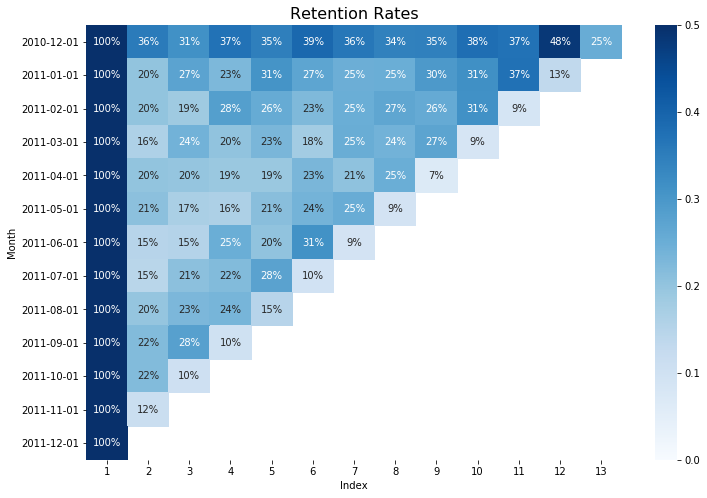

In [236]:
# Plot the heatmap using seaborn
plt.figure(figsize = (12, 8))
plt.title('Retention Rates', fontsize = 16)
sns.heatmap(retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.5,
            cmap='Blues')
plt.xlabel('Index')
plt.ylabel('Month')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show() 

## Cohort Analysis for Average Spending

In [249]:
online['Spending'] = online['UnitPrice'] * online['Quantity']

InvoiceNo                          C581484
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                            -80995
InvoiceDate            2011-12-09 09:27:00
UnitPrice                             2.08
CustomerID                           16446
Country                     United Kingdom
InvoiceDay             2011-12-01 00:00:00
CohortDay              2011-12-01 00:00:00
CohortIndex                              1
CohortMonth            2011-12-01 00:00:00
Spending                           -168470
Name: 540422, dtype: object

In [240]:
cohort_data_price = online.groupby(['CohortMonth', 'CohortIndex'])['Spending'].mean().reset_index()
average_spending = cohort_data_price.pivot(index='CohortMonth', columns='CohortIndex', values='Spending').round(2)
average_spending

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.44,24.27,23.53,24.94,19.20,22.50,25.26,22.88,20.01,28.21,29.50,20.38,22.36
2011-01-01,20.23,20.30,22.16,23.83,32.99,31.16,25.74,31.81,35.50,17.66,24.84,24.06,NaN
2011-02-01,20.65,18.92,18.12,16.41,19.80,13.05,41.88,20.90,23.14,20.38,19.39,NaN,NaN
2011-03-01,18.27,14.24,22.66,24.52,22.56,17.45,22.20,21.23,17.86,14.72,NaN,NaN,NaN
2011-04-01,19.74,19.47,19.58,19.64,20.26,13.51,14.95,15.72,11.37,NaN,NaN,NaN,NaN
2011-05-01,18.94,23.53,20.32,20.89,18.02,14.71,17.02,17.70,NaN,NaN,NaN,NaN,NaN
2011-06-01,-15.05,14.69,18.12,16.72,15.92,14.12,13.33,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,11.69,22.08,12.49,18.14,11.41,11.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.98,11.81,13.95,14.21,18.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# drop the outlier
online.drop(index = 540422, inplace = True)

KeyError: '[540422] not found in axis'

In [253]:
cohort_data_price = online.groupby(['CohortMonth', 'CohortIndex'])['Spending'].mean().reset_index()
average_spending = cohort_data_price.pivot(index='CohortMonth', columns='CohortIndex', values='Spending').round(2)
average_spending

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.44,24.27,23.53,24.94,19.20,22.50,25.26,22.88,20.01,28.21,29.50,20.38,22.36
2011-01-01,20.23,20.30,22.16,23.83,32.99,31.16,25.74,31.81,35.50,17.66,24.84,24.06,NaN
2011-02-01,20.65,18.92,18.12,16.41,19.80,13.05,41.88,20.90,23.14,20.38,19.39,NaN,NaN
2011-03-01,18.27,14.24,22.66,24.52,22.56,17.45,22.20,21.23,17.86,14.72,NaN,NaN,NaN
2011-04-01,19.74,19.47,19.58,19.64,20.26,13.51,14.95,15.72,11.37,NaN,NaN,NaN,NaN
2011-05-01,18.94,23.53,20.32,20.89,18.02,14.71,17.02,17.70,NaN,NaN,NaN,NaN,NaN
2011-06-01,-15.05,14.69,18.12,16.72,15.92,14.12,13.33,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,11.69,22.08,12.49,18.14,11.41,11.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.98,11.81,13.95,14.21,18.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


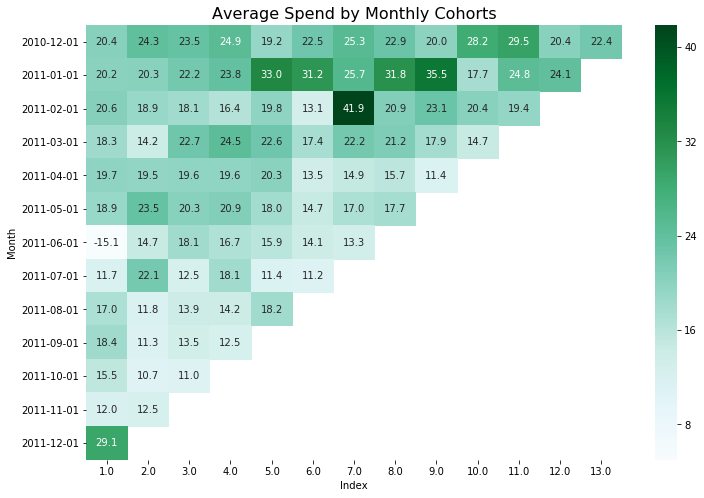

In [286]:
average_spending.index = average_spending.index.astype('str')
plt.figure(figsize = (12, 8))
plt.title('Average Spend by Monthly Cohorts', fontsize = 16)
sns.heatmap(average_spending, 
            annot = True,
            vmin = 5,
            fmt = '.3', 
            cmap='BuGn')
plt.xlabel('Index')
plt.ylabel('Month')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show() 

In [287]:
# Month that has the worst performance
online[(online.CohortMonth == '2011-06-01') & (online.Quantity <= 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,CohortMonth,Spending
519820,C580168,22329,ROUND CONTAINER SET OF 5 RETROSPOT,-1,2011-12-02 11:34:00,1.65,12465.0,Belgium,2011-12-01,2011-06-01,7.0,2011-06-01,-1.65
214907,C555636,22674,FRENCH TOILET SIGN BLUE METAL,-12,2011-06-06 12:33:00,1.25,15073.0,United Kingdom,2011-06-01,2011-06-01,1.0,2011-06-01,-15.00
225305,C556649,23108,SET OF 10 LED DOLLY LIGHTS,-2,2011-06-13 16:15:00,6.25,15238.0,United Kingdom,2011-06-01,2011-06-01,1.0,2011-06-01,-12.50
214906,C555636,22675,FRENCH KITCHEN SIGN BLUE METAL,-12,2011-06-06 12:33:00,1.25,15073.0,United Kingdom,2011-06-01,2011-06-01,1.0,2011-06-01,-15.00
255449,C559347,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,-12,2011-07-07 17:22:00,1.25,18072.0,United Kingdom,2011-07-01,2011-06-01,2.0,2011-06-01,-15.00
294923,C562728,22849,BREAD BIN DINER STYLE MINT,-1,2011-08-09 09:41:00,14.95,12406.0,Denmark,2011-08-01,2011-06-01,3.0,2011-06-01,-14.95
220094,C556117,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,-12,2011-06-09 09:44:00,1.25,12802.0,Netherlands,2011-06-01,2011-06-01,1.0,2011-06-01,-15.00
494785,C578274,85034C,3 ROSE MORRIS BOXED CANDLES,-1,2011-11-23 13:42:00,1.25,17828.0,Malta,2011-11-01,2011-06-01,6.0,2011-06-01,-1.25
350502,C567643,23298,SPOTTY BUNTING,-1,2011-09-21 14:16:00,4.15,12409.0,Switzerland,2011-09-01,2011-06-01,4.0,2011-06-01,-4.15
425161,C573306,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-10-28 16:15:00,9.95,17837.0,United Kingdom,2011-10-01,2011-06-01,5.0,2011-06-01,-9.95
